# Imports

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')
# pd.options.display.max_columns = None

import pandas as pd
import numpy as np
from scipy.stats import iqr

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Models
from sklearn.model_selection import train_test_split


# Retrieve data
import yfinance as yf

# Scaling the data
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Retrieve data

In [2]:
# Retrieve data from ticker
ticker = "AAPL"  #
data = yf.Ticker(ticker)

# Download data history
historical_data = data.history(period="10y")
historical_data.reset_index(inplace=True)

# Keep date as index
historical_data.set_index(keys = 'Date', inplace=True)
historical_data.tail()

Open        High         Low       Close  \
Date                                                                        
2024-09-26 00:00:00-04:00  227.300003  228.500000  225.410004  227.520004   
2024-09-27 00:00:00-04:00  228.460007  229.520004  227.300003  227.789993   
2024-09-30 00:00:00-04:00  230.039993  233.000000  229.649994  233.000000   
2024-10-01 00:00:00-04:00  229.520004  229.649994  223.740005  226.210007   
2024-10-02 00:00:00-04:00  225.889999  226.110001  223.940002  223.955002   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-09-26 00:00:00-04:00  36636700        0.0           0.0  
2024-09-27 00:00:00-04:00  34026000        0.0           0.0  
2024-09-30 00:00:00-04:00  54541900        0.0           0.0  
2024-10-01 00:00:00-04:00  62940000        0.0           0.0  
2024-10-02 00:00:00-04:00   2411177        0.0           0.0

# Explore data


<span style="font-family:Comic Sans MS; color:red">Let's quickly explore the data ! </span>


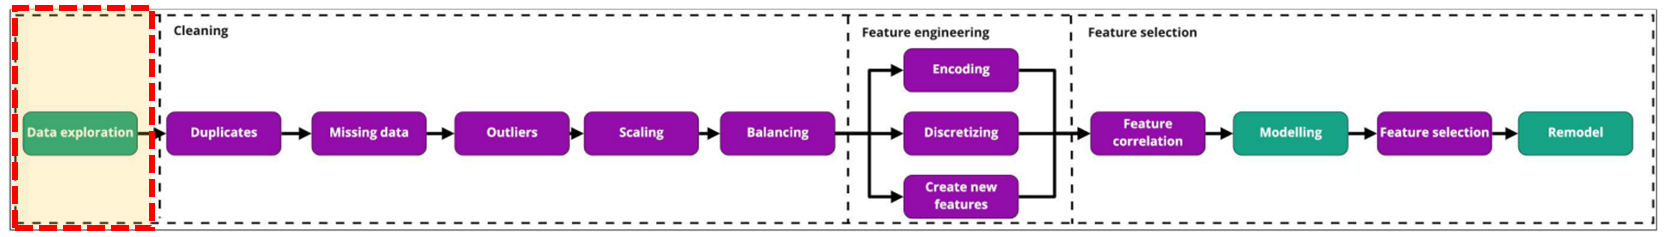


In [3]:
# Shape
historical_data.shape

(2517, 7)

In [4]:
# Columns
historical_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [5]:
# Statistics
historical_data.describe()

Open         High          Low        Close        Volume  \
count  2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean     89.069821    90.026410    88.169334    89.139271  1.210435e+08   
std      62.614262    63.278324    61.988014    62.663103  6.949412e+07   
min      20.642054    21.025078    20.520501    20.720039  2.411177e+06   
25%      33.027883    33.214127    32.825366    33.009270  7.417280e+07   
50%      54.584793    55.104898    54.010360    54.398647  1.034728e+08   
75%     146.720521   148.572618   145.454307   146.898331  1.478228e+08   
max     236.206595   236.955728   232.820515   234.548523  6.488252e+08   

         Dividends  Stock Splits  
count  2517.000000   2517.000000  
mean      0.002994      0.001589  
std       0.024116      0.079729  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       0.250000      4.000000

In [6]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-10-02 00:00:00-04:00 to 2024-10-02 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2517 non-null   float64
 1   High          2517 non-null   float64
 2   Low           2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Volume        2517 non-null   int64  
 5   Dividends     2517 non-null   float64
 6   Stock Splits  2517 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.3 KB


# Data Cleaning and Feature Engineering


<span style="font-family:Comic Sans MS; color:red">Let's clean the data ! </span>



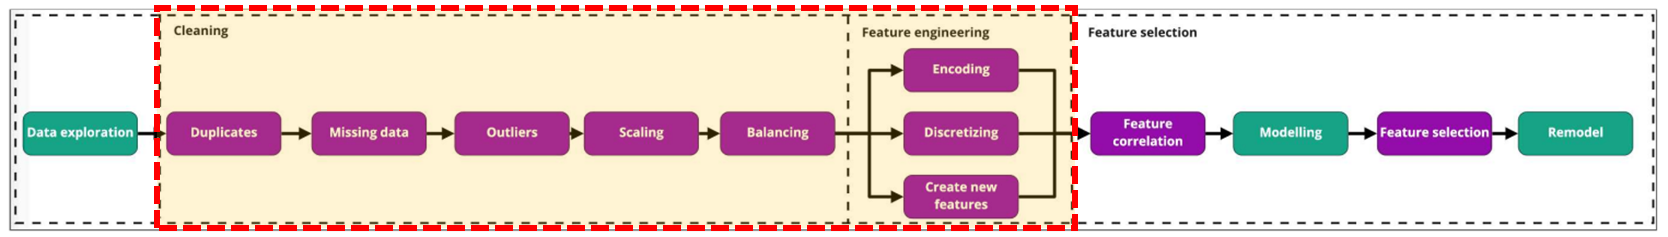


## Duplicates


In [7]:
# Check number of rows before removing duplicates
print(f"Number of rows : {len(historical_data)}")

# Compute the number of duplicated rows
print(f"Number of duplicated rows : {historical_data.duplicated().sum()}")

# Remove duplicates
# data = data.drop_duplicates() 


Number of rows : 2517
Number of duplicated rows : 0


## Missing data



In [8]:
def get_missing_data(data):       
    # Counting the percentage of NaN for each column
    missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column

    # missing_data
    missing_data = missing_data[missing_data > 0]

    #Missing data column names
    missing_cols = missing_data.index.values.tolist()

    #Show missing data in percent
    return missing_data

missing_data = get_missing_data(historical_data)
missing_data

Series([], dtype: float64)

In [9]:
# historical_data.dropna(axis = 0, subset='Close_plus_1', inplace=True)

In [10]:
missing_data = get_missing_data(historical_data)
missing_data

Series([], dtype: float64)

## Outliers


### Identificate numerical columns



In [11]:
# Extract numerical columns from original dataset
numerical_columns = historical_data.select_dtypes(include = np.number).columns
numerical_columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

### Visual checks for outliers


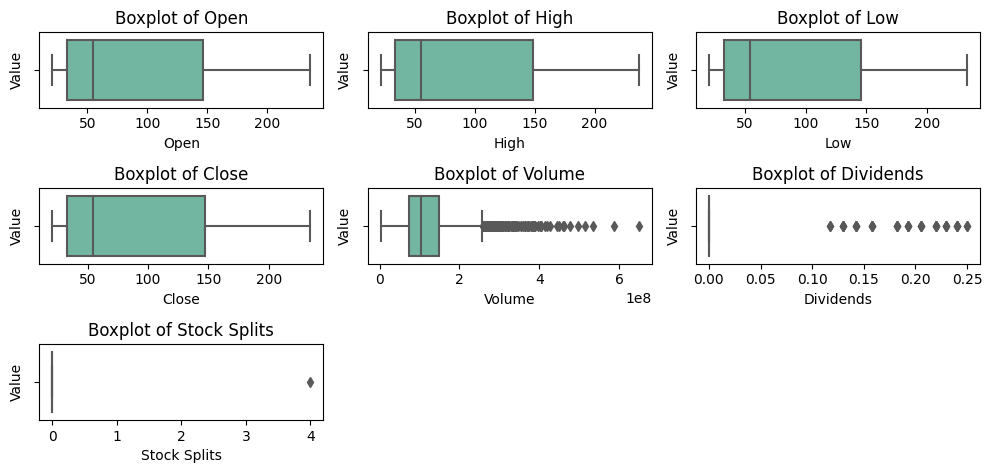

In [12]:
# Plot boxplots of each numerical column
plt.figure(figsize=(10, 20))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(13, 3, i)    
    sns.boxplot(x=historical_data[column], palette='Set2')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

<span style="font-family:Comic Sans MS; color:red">Plot a specific boxplot. Insert column name below : </span>
    

In [13]:
specific_column = 'Volume'

Text(0, 0.5, 'Value')

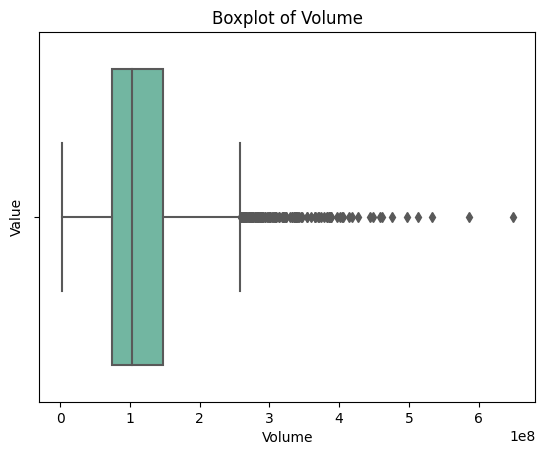

In [14]:
# Plot a specific boxplot
sns.boxplot(x=historical_data[specific_column], palette='Set2')
plt.title(f'Boxplot of {specific_column}')
plt.xlabel(specific_column)
plt.ylabel('Value')

### Numerical check for outliers


<span style="font-family:Comic Sans MS; color:red"> Let's numerically extract the columns with outliers ! </span>


In [15]:
# Identify the columns with outliers
numerical_columns_w_outliers = []
numerical_columns_no_outliers = []

for col in numerical_columns: 
    # Calculate IQR
    iqr_value = iqr(historical_data[col])

    #Calculate 1st quartile
    q1 = np.percentile(historical_data[col],25)

    #Calculate 3rd quartile
    q3 = np.percentile(historical_data[col],75)

    #Calculate lower limit below which data point is considered an outlier
    outlier_lim_low = q1 - 1.5 * iqr_value

    #Calculate higher limit above which data point is considered an outlier
    outlier_lim_high = q3 + 1.5 * iqr_value
    
    #Calculate number of 'low' outliers
    outlier_condition_low = historical_data[col] < outlier_lim_low
    number_outliers_low = len(historical_data[outlier_condition_low][col])
    
    #Calculate number of 'high' outliers
    outlier_condition_high = historical_data[col] > outlier_lim_high
    number_outliers_high = len(historical_data[outlier_condition_high][col])
    
    #Calculate total number of outliers
    number_outliers_total = number_outliers_low + number_outliers_high
    
#     print(f'------------------  {col}  -----------------------')
#     print(f'Number of outliers : {number_outliers_total}')
#     print('---------------------------------------------------')
    
    #If any outliers in column, column is added to a list of columns with outliers
    if number_outliers_total > 0:
        numerical_columns_w_outliers.append(col)
    elif number_outliers_total == 0:
        numerical_columns_no_outliers.append(col)
        
        

<span style="font-family:Comic Sans MS; color:red">Let's display the numerical columns WITH outliers :  </span>


In [16]:
numerical_columns_w_outliers

['Volume', 'Dividends', 'Stock Splits']

<span style="font-family:Comic Sans MS; color:red">Let's display the numerical columns WITHOUT outliers :  </span>


In [17]:
numerical_columns_no_outliers

['Open', 'High', 'Low', 'Close']

## Scaling the data


### Scaling numerical columns WITH outliers


<span style="font-family:Comic Sans MS; color:red">We consider using Robust scaling for columns WITH outliers !  </span>

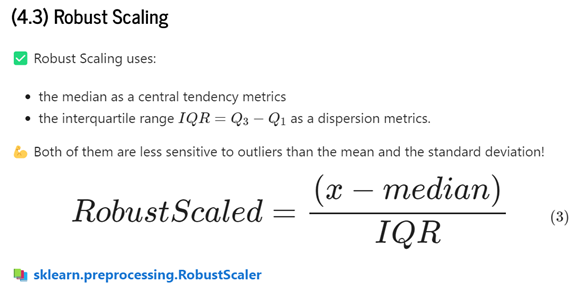


In [18]:
# Describe columns with outliers
historical_data[numerical_columns_w_outliers].describe()

Volume    Dividends  Stock Splits
count  2.517000e+03  2517.000000   2517.000000
mean   1.210435e+08     0.002994      0.001589
std    6.949412e+07     0.024116      0.079729
min    2.411177e+06     0.000000      0.000000
25%    7.417280e+07     0.000000      0.000000
50%    1.034728e+08     0.000000      0.000000
75%    1.478228e+08     0.000000      0.000000
max    6.488252e+08     0.250000      4.000000

In [19]:
# Instantiate the robust scaler
rb_scaler = RobustScaler() 

# Fit the robust scaler on X_train
rb_scaler.fit(historical_data[numerical_columns_w_outliers]) 

# Transform X_train and X_test through the fitted robust scaler
historical_data[numerical_columns_w_outliers] = rb_scaler.transform(historical_data[numerical_columns_w_outliers])

In [20]:
# Describe columns with outliers after robust scaling
historical_data[numerical_columns_w_outliers].describe()

Volume    Dividends  Stock Splits
count  2517.000000  2517.000000   2517.000000
mean      0.238570     0.002994      0.001589
std       0.943573     0.024116      0.079729
min      -1.372188     0.000000      0.000000
25%      -0.397828     0.000000      0.000000
50%       0.000000     0.000000      0.000000
75%       0.602172     0.000000      0.000000
max       7.404649     0.250000      4.000000

### Scaling numerical columns with NO outliers




<span style="font-family:Comic Sans MS; color:red">We consider using MinMax scaling for columns WITH NO outliers !  </span>


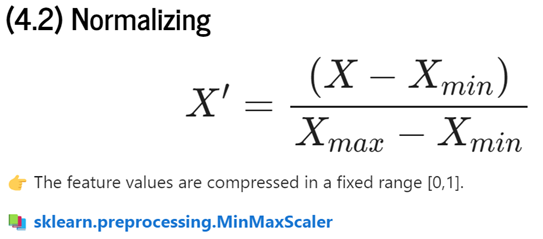


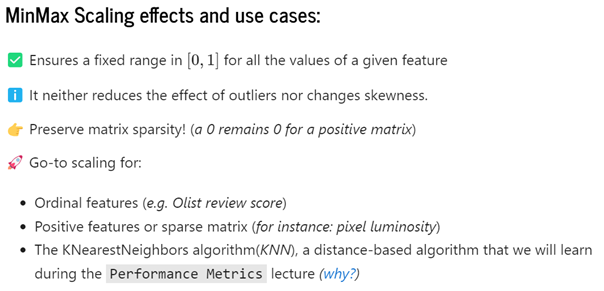


In [21]:
# Describe columns with NO outliers (BEFORE SCALING)
print('Description of the numerical columns WITHOUT outliers (BEFORE SCALING)')
historical_data[numerical_columns_no_outliers].describe()

Description of the numerical columns WITHOUT outliers (BEFORE SCALING)


Open         High          Low        Close
count  2517.000000  2517.000000  2517.000000  2517.000000
mean     89.069821    90.026410    88.169334    89.139271
std      62.614262    63.278324    61.988014    62.663103
min      20.642054    21.025078    20.520501    20.720039
25%      33.027883    33.214127    32.825366    33.009270
50%      54.584793    55.104898    54.010360    54.398647
75%     146.720521   148.572618   145.454307   146.898331
max     236.206595   236.955728   232.820515   234.548523

Histograms of the numerical columns WITHOUT outliers (BEFORE SCALING)


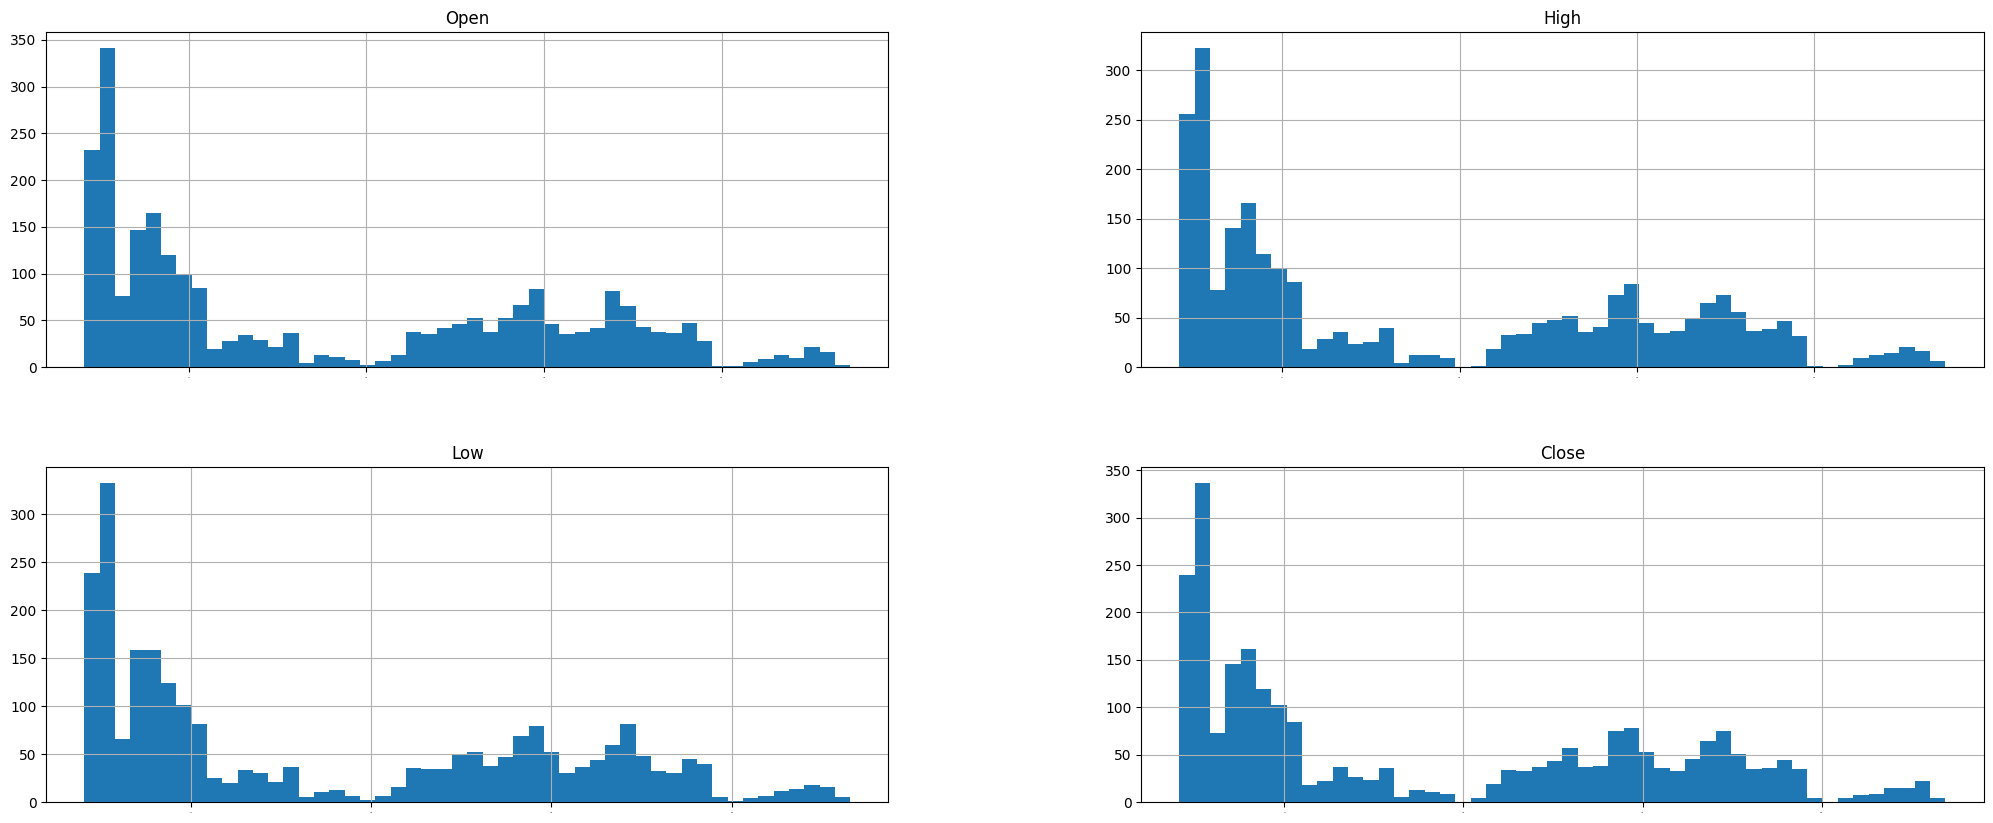

In [22]:
# Data histograms
print("Histograms of the numerical columns WITHOUT outliers (BEFORE SCALING)")
historical_data[numerical_columns_no_outliers].hist(bins = 50, figsize = (25,10), xlabelsize=0)
plt.show()


In [23]:
# Display description of each columns with no outliers (BEFORE SCALING)
print("Description of the columns without outliers (BEFORE SCALING)")
for col in numerical_columns_no_outliers:
    print(f"----------------- {col} --------------")
    print(historical_data[col].describe())
    print('---------------------------------------\n')

Description of the columns without outliers (BEFORE SCALING)
----------------- Open --------------
count    2517.000000
mean       89.069821
std        62.614262
min        20.642054
25%        33.027883
50%        54.584793
75%       146.720521
max       236.206595
Name: Open, dtype: float64
---------------------------------------

----------------- High --------------
count    2517.000000
mean       90.026410
std        63.278324
min        21.025078
25%        33.214127
50%        55.104898
75%       148.572618
max       236.955728
Name: High, dtype: float64
---------------------------------------

----------------- Low --------------
count    2517.000000
mean       88.169334
std        61.988014
min        20.520501
25%        32.825366
50%        54.010360
75%       145.454307
max       232.820515
Name: Low, dtype: float64
---------------------------------------

----------------- Close --------------
count    2517.000000
mean       89.139271
std        62.663103
min        20.720

In [24]:
# We choose to focus on only ONE column (at first)
numerical_columns_no_outliers = 'Close'

# Instantiate the scaler
minmax_scaler = MinMaxScaler()

# Fit the scaler on entire data
minmax_scaler.fit(historical_data['Close'].values.reshape(-1,1)) 

# Transform entire data through the fitted scaler
historical_data[numerical_columns_no_outliers] = minmax_scaler.transform(historical_data['Close'].values.reshape(-1,1))

# Message displayed
print("SCALING DONE !")

SCALING DONE !


In [25]:
# If there is only one column considered (string). This code is ignored otherwise.
if type(numerical_columns_no_outliers) == str:
    numerical_columns_no_outliers_list = []
    numerical_columns_no_outliers_list.append(numerical_columns_no_outliers)
    numerical_columns_no_outliers = numerical_columns_no_outliers_list
    
# Display description of each columns with no outliers (AFTER SCALING)
print("Description of the columns without outliers (AFTER SCALING)") 
for col in numerical_columns_no_outliers:
    print(f"----------------- {col} --------------")
    print(historical_data[col].describe())
    print('---------------------------------------\n')

Description of the columns without outliers (AFTER SCALING)
----------------- Close --------------
count    2517.000000
mean        0.319972
std         0.293053
min         0.000000
25%         0.057472
50%         0.157503
75%         0.590091
max         1.000000
Name: Close, dtype: float64
---------------------------------------



## Balancing


<span style="font-family:Comic Sans MS; color:red"> NOT PERFORMED ! </span>



## Encoding


<span style="font-family:Comic Sans MS; color:red"> NOT PERFORMED ! </span>



## Discretizing


<span style="font-family:Comic Sans MS; color:red"> NOT PERFORMED ! </span>



## Create new features


<span style="font-family:Comic Sans MS; color:red"> NOT PERFORMED ! </span>



# Feature selection


<span style="font-family:Comic Sans MS; color:red">Let's clean the data ! </span>



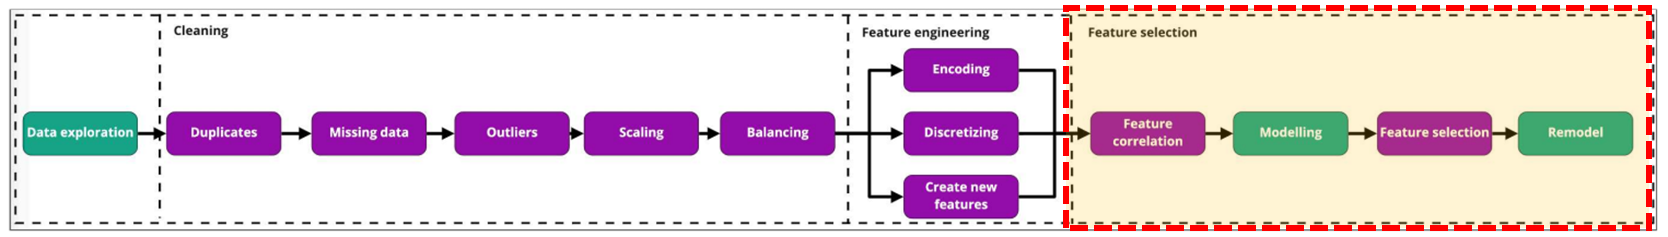


## Feature correlation


<span style="font-family:Comic Sans MS; color:red"> NOT PERFORMED ! </span>



## Modeling


### Define data


In [26]:
# We focus on 1 unique column
data = historical_data['Close']

print("We'll work with the following data for the predictions.")
data

We'll work with the following data for the predictions.


Date
2014-10-02 00:00:00-04:00    0.006807
2014-10-03 00:00:00-04:00    0.006516
2014-10-06 00:00:00-04:00    0.006516
2014-10-07 00:00:00-04:00    0.005613
2014-10-08 00:00:00-04:00    0.007741
                               ...   
2024-09-26 00:00:00-04:00    0.967130
2024-09-27 00:00:00-04:00    0.968393
2024-09-30 00:00:00-04:00    0.992758
2024-10-01 00:00:00-04:00    0.961004
2024-10-02 00:00:00-04:00    0.950458
Name: Close, Length: 2517, dtype: float64

In [27]:
# Let's reshape the data
print(data.shape)
data = data.values.reshape(-1, 1)
print(data.shape)
print("The data has been reshaped.")

(2517,)
(2517, 1)
The data has been reshaped.


## Define X_train, X_test, y_train and y_test



In [ ]:
# Essai avec Close uniquement
data = historical_data['Close']
data

In [ ]:
date_mesure = data.index.values.reshape(-1,1)
print(date_mesure.shape)

In [ ]:
print(data.shape)
data = data.values.reshape(-1, 1)
print(data.shape)

In [ ]:
# Création des ensembles d'entraînement et de test
data_percentage = 0.8
train_size = int(len(data) * data_percentage)

train_data = data[:train_size]
test_data = data[train_size:]

# Gestion des dates d'entraînement et de test
train_dates = date_mesure[:train_size]
test_dates = date_mesure[train_size:]


In [ ]:
# Fonction pour créer des séquences (X) et des labels (y)
def create_dataset(dataset, time_step=60, dates=None):
    X, y = [], []
    time = []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i - time_step:i, 0])       
        y.append(dataset[i, 0])
        time.append(dates[i,0])
    return np.array(X), np.array(y), np.array(time)


# 5. Créer les jeux de données pour l'entraînement et le test
time_step = 1  # 10 jours de données passées pour prédire le prochain
X_train, y_train, y_train_dates = create_dataset(train_data, time_step, train_dates)
X_test, y_test, y_test_dates = create_dataset(test_data, time_step, test_dates)

In [ ]:
# # Fonction pour créer des séquences (X) et des labels (y)
# def create_dataset(dataset, time_step=60):
#     X, y = [], []
#     for i in range(time_step, len(dataset)):
#         X.append(dataset[i - time_step:i, 0])       
#         y.append(dataset[i, 0])
#     return np.array(X), np.array(y)


# # 5. Créer les jeux de données pour l'entraînement et le test
# time_step = 10  # 10 jours de données passées pour prédire le prochain
# X_train, y_train = create_dataset(train_data, time_step)
# X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
# Display shapes
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of y_test : {y_test.shape}")


# Expand dimensions



In [ ]:
# Reshape les données pour LSTM (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_test : {X_test.shape}")


# Create RNN model


In [ ]:
# Create RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

def define_RNN_model():
    # 1- RNN Architecture
    model = Sequential()
    model.add(layers.LSTM(units=2, activation='tanh', input_shape=X_train.shape[1:3]))
    model.add(layers.Dense(1, activation="linear"))

    # 2- Compilation
    model.compile(loss='mse', optimizer='adam', metrics =['mse', 'mae'])
    
    return model

# Train RNN model

In [ ]:
%%time 
model = define_RNN_model()

# Fitting RNN model
es = EarlyStopping(patience = 20, restore_best_weights=True)

history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=16,
                    epochs=1000,
                    verbose=0,
                    callbacks=[es],
                    validation_split=0.3,
                    shuffle=False)


In [ ]:
# history.__dict__

In [ ]:
def plot_loss_metric(history, metric, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))

    # --- LOSS --- 

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])

    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')

    min_loss = min(min(history.history['loss']),min(history.history['val_loss']))
    max_loss = max(max(history.history['loss']),max(history.history['val_loss']))
    ax[0].set_ylim((min_loss,max_loss))

    ax[0].legend(['Train', 'Test'], loc='best')

    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- METRIC

    ax[1].plot(history.history[metric])
    ax[1].plot(history.history[f'val_{metric}'])

    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel(metric)
    
    ax[1].set_xlabel('Epoch')

    ax[1].legend(['Train', 'Test'], loc='best')
    
    min_metric = min(min(history.history[metric]),min(history.history[f'val_{metric}']))
    max_metric = max(max(history.history[metric]),max(history.history[f'val_{metric}']))
    ax[1].set_ylim((min_metric,max_metric))

    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

In [ ]:
plot_loss_metric(history, 'mae')


In [ ]:
model.evaluate(X_test,y_test)

# Predictions


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(y_test.shape)
y_test = y_test.reshape(-1,1)
print(y_test.shape)

In [ ]:
print(y_train.shape)
y_train = y_train.reshape(-1,1)
print(y_train.shape)

In [ ]:
y_test = minmax_scaler.inverse_transform(y_test)  # Reconvertir en prix original
y_pred = minmax_scaler.inverse_transform(y_pred)  # Reconvertir en prix original
y_train = minmax_scaler.inverse_transform(y_train)  # Reconvertir en prix original

In [ ]:
# Plot les prix de clôture réels vs prédits
plt.figure(figsize=(16,8))
plt.title(f'Prédiction du cours des actions {ticker} avec LSTM')
plt.plot(y_train_dates, y_train)
plt.plot(y_test_dates, y_test)
plt.plot(y_test_dates, y_pred)
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Prix de clôture en USD', fontsize=18)
plt.show()

In [ ]:
# Plot les prix de clôture réels vs prédits
plt.figure(figsize=(16,8))
plt.title(f'Prédiction du cours des actions {ticker} avec LSTM')
plt.plot(y_test_dates, y_test)
plt.plot(y_test_dates, y_pred)
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Prix de clôture en USD', fontsize=18)
plt.show()


In [ ]:
# Afficher les dernières lignes des données réelles et prédites
def retrieve_element(s):
    return s[0]

actual_and_pred = pd.DataFrame({'actual' : y_test.tolist(),
                                 'predictions' : y_pred.tolist()},
                                 index = y_test_dates)

actual_and_pred['actual'] = actual_and_pred['actual'].apply(retrieve_element)
actual_and_pred['predictions'] = actual_and_pred['predictions'].apply(retrieve_element)
actual_and_pred['diff'] = np.abs(actual_and_pred['actual'] - actual_and_pred['predictions'])

actual_and_pred.describe()